# Classification Assignment 2: 

# Objective and approach:

* In this assignment we will learn classification in detail. 

* The dataset that we will use for implementing classification algorithm is the banking dataset. It is related to drive the       campaign and predict if the client will subscribe to a term deposit or not. For classification problem we will assign binary   values 0 and 1 for classifying if the customer will subscribe or no. 

* To do so we shall synthesize four algorithms and learn this technique extensively. 

* Following are the algorithms: 

    1. Logistic Regression
    2. Linear Discriminant Analysis
    3. Quadratic Discriminant Analysis
    4. Perceptron and Pocket Algorithm.

We shall implement them step by step as below.

 # Data: 
 
<b>Description</b>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


<b>There are four datasets: </b>

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] 

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


<b>Attribute Information:</b>

 Input variables:

* <u>Bank client data:</u>

    1 - age (numeric) 
    
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-                 employed','services','student','technician','unemployed','unknown') 
    
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or               widowed)
    
    4 - education(categorical:'basic.4y','basic.6y','basic.9y',
     'high.school','illiterate','professional.course','university.degree','unknown') 
     
    5 - default: has credit in default? (categorical: 'no','yes','unknown') 
    
    6 - housing: has housing loan? (categorical: 'no','yes','unknown') 
    
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')


* <u>Related with the last contact of the current campaign:</u>


    8 - contact: contact communication type (categorical: 'cellular','telephone') 
    
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
    
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 
    
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the 
         output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
         Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark 
         purposes and should be discarded if the intention is to have a realistic predictive model.


* <u>Other attributes: </u>

    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 

    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999                  means client was not previously contacted) 

    14 - previous: number of contacts performed before this campaign and for this client (numeric) 

    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


* <u>Social and economic context attributes </u>

    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric) 
    
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    
    

* <b>Output variable (desired target): </b>

    21 - 1 - has the client subscribed a term deposit? (binary: 'yes','no') NOTE: at this point of time we will not proceed         with the actual calculations for prediction as the aim of this assignment is to only visualize the data. 

    We will start experimenting this objective with the help of bank dataset that we have chosen. Following are the codes in Python 3. 
    
    At the beginning we will simply import all packages that we require for computation and visualization of the data. After reading the information, we will take a quick look at whats in the CSV file and accordingly we will try to preprocess the data which would be appropriate for further model building. 
    
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank11.csv")


df.set_index("deposit", inplace= True)

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [3]:
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome  deposit  
0    5   may      1042         1     -1         0  unknown        1  
1    5   may      1467         1     -1         0  unknown        1  
2    5   may      1389         1     -1         0  unknown        1  
3    5   may       579         1     -1         0  unknown        1  
4    5   may       673         2     -1         0  unknown        1  


    Here we could observe that we have multiple features and we want to classify the client's information to understand if he/she has subscribed term deposits or no. The deposit entity has binary values, 0 and 1 where 1 means yes and 0 means no. 

In [4]:
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous       deposit  
count  11162.000000  11162.000000  11162.000000  
mean      51.330407      0.832557      0.473840  
std      108.758282      2.292007      0.499338  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000     

As we describe the data, we get to understand the mean and standard deviation along with other distributive measures of the data. We certainly need to understand these values for further steps where our aim is to normally distribute the data. In terms of normalization of X dataset too, it will be handy to know what are the values of each feature available in bank dataset. 

# Visualization

We will start plotting features to know their impact on the target variable. In practical world, we may have many features but not all of them are important to classify the outcome. 

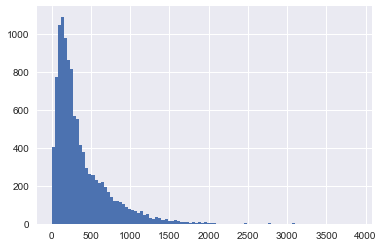

In [5]:
plt.hist((df.duration),bins=100)
plt.show()

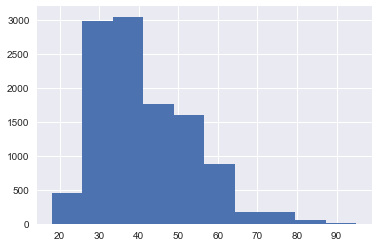

In [6]:
plt.hist(df.age,bins=10)
plt.show()

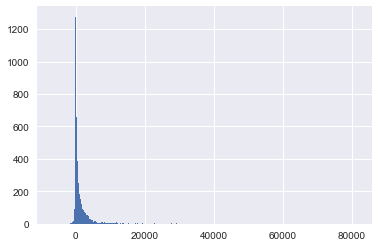

In [7]:
plt.hist(df.balance,bins=1000)
plt.show()

<b> Observation of histograms: </b>
    
    
Above, All the Histogram suggest that data is skewed towards left i.e. existence of skewness brings us to a point that we need to sample the data efficiently while classifiying the train_data and test_data !

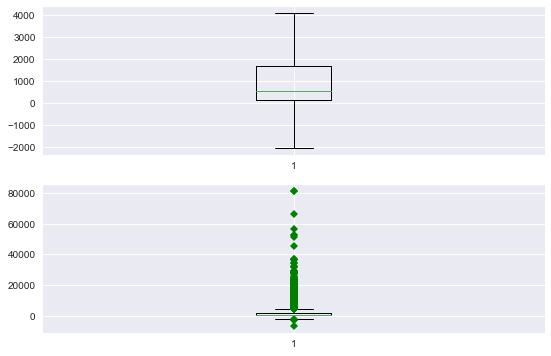

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(df.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(df.balance,0,'gD')
plt.show()

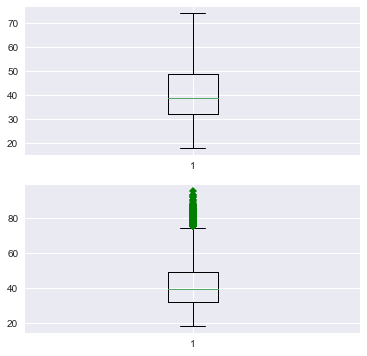

In [9]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(df.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(df.age,0,'gD')
plt.show()

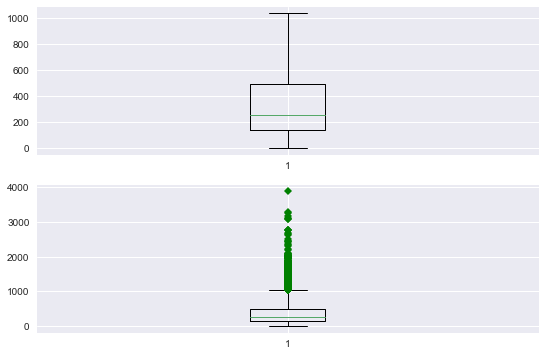

In [10]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(df.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(df.duration,0,'gD')
plt.show()

<b> Observation of a box- whisker plot</b>


Above boxplot suggest how the data is spread across the dataset Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.


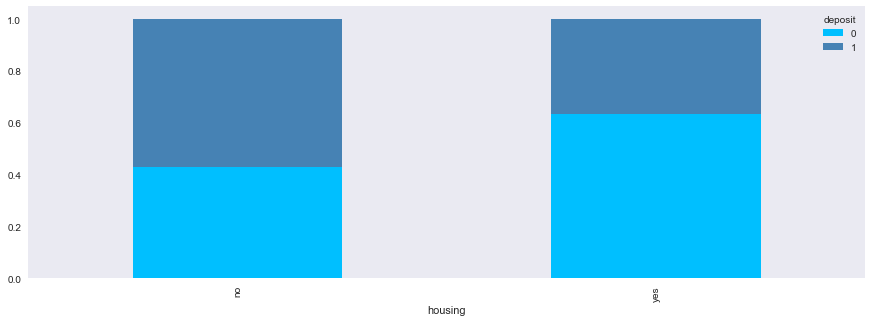

In [11]:
draw_data = pd.crosstab(df.housing, df.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

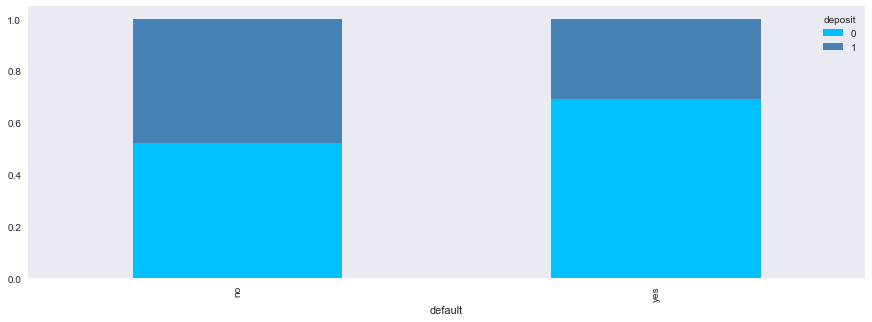

In [12]:
draw_data = pd.crosstab(df.default, df.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

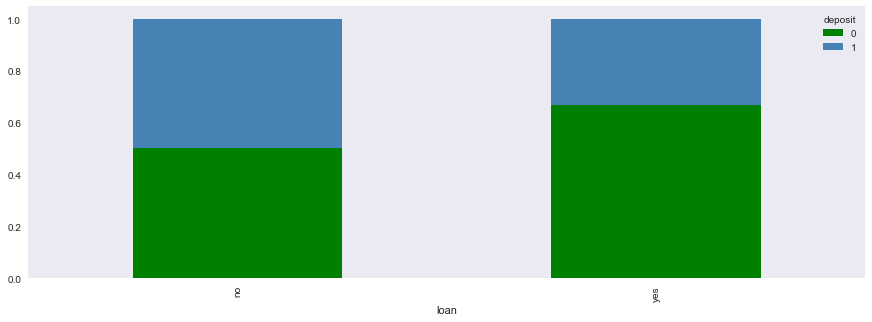

In [13]:
draw_data = pd.crosstab(df.loan, df.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green','steelblue'],grid=False, figsize=(15, 5))
plt.show()


By looking at the bar graph, we can observe that Feature vs Label the data is wide spread i.e. we cannot predict completely based on feature alone. Hence we will preprocess the data in such a way that all our attributes will be a "Categorical" input variables for classifying deposit. 

Lets visualize more.. 

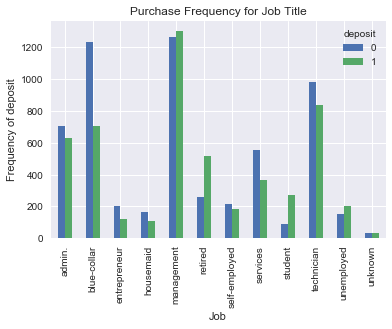

In [14]:
%matplotlib inline
pd.crosstab(df.job,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of deposit')
plt.savefig('purchase_fre_job')

In the bar chart plotted above, we are trying to decide whether job will be a good attribute for moving on with classification. It can be understood that the frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

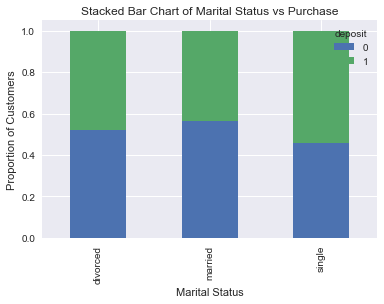

In [15]:
table=pd.crosstab(df.marital,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Marital status attribute does not really help us in differentiating much and hence we would drop this attribute while building a model. 

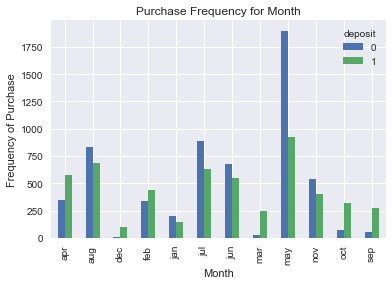

In [16]:
pd.crosstab(df.month,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Based on the insights of the attributes which do and do not influence the classification we will begin to preprocess the data. 
Lets drop some of the attributes to simplify our model and read the data to understand what we have next. 

# Preliminary Observations: 

These are the highlights from all observations mentioned above: 

1. Feature vs Label the data is wide spread
2. We have chosen job default housing loan contact month campaign for classification of deposite.
3. Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.
4. All the Histogram suggest that data is skewed towards left

In [17]:
df = df.drop(['day','poutcome'],axis=1)
y=df['deposit']
df = df.drop(['deposit','balance','previous','pdays','age','duration','education','marital'],axis=1)
df.head()

,job,default,housing,loan,contact,month,campaign
0,admin.,no,yes,no,unknown,may,1
1,admin.,no,no,no,unknown,may,1
2,technician,no,yes,no,unknown,may,1
3,services,no,yes,no,unknown,may,1
4,admin.,no,no,no,unknown,may,2


# Preprocessing: 

We can see that the job column has values in terms of job title and as discussed above yes we do need this attribute.The deafult, loan and house has "yes" and "No" values. Months are named by their values and campaign shows numerical values. We shall convert all these values in categorical form and compute further. 

After preprocessing is done, lets split the data into train and test set for further analysis and read the top 5 rows to validate that the changes have taken place correctly. 

In [18]:
from sklearn.model_selection import train_test_split

# Convert these variables into categorical variables
df["housing"] = df["housing"].astype('category').cat.codes
df["job"] = df["job"].astype('category').cat.codes
df["default"] = df["default"].astype('category').cat.codes
df["loan"] = df["loan"].astype('category').cat.codes
df["contact"] = df["contact"].astype('category').cat.codes
df["month"] = df["month"].astype('category').cat.codes

# Create train and test splits

X= df

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=123, stratify=y)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Along with train and test, lets check our target if that shows binary values:

In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [20]:
print(df.keys)

<bound method NDFrame.keys of        job  default  housing  loan  contact  month  campaign
0        0        0        1     0        2      8         1
1        0        0        0     0        2      8         1
2        9        0        1     0        2      8         1
3        7        0        1     0        2      8         1
4        0        0        0     0        2      8         2
5        4        0        1     1        2      8         2
6        4        0        1     1        2      8         1
7        5        0        1     0        2      8         1
8        9        0        1     0        2      8         1
9        7        0        1     0        2      8         3
10       0        0        1     0        2      8         1
11       1        0        1     0        2      8         2
12       4        0        1     1        2      8         4
13       1        0        1     0        2      8         2
14       9        0        1     0        2      8     

In [21]:
print(df.groupby(y).size())

deposit
0    5873
1    5289
dtype: int64


After our data is ready, lets start computing the algorithms. 


# Method:

Lets begin by building a super class. 

In [22]:
import numpy as np
import abc
from abc import ABC, abstractmethod
# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

In the given superclass, we have mainly defined functions that would be a backbone of the module. 

1. Normalize
     
2. Check matrix
 
3. Add ones

 TODO task: 
    We normalize the values of our data as we know that our algorithms demand data to be in Gaussian/ Normal distribution format. 
    The formula for normalization is : X - mean/standard deviation.
    
    Using this formula in class, we have normalized the values of X data.

# Summary of Classification Models: 





# Logistic regression 

It is named for the function used at the core of the method, the logistic function.
The logistic function, also called the sigmoid function was developed by statisticians to describe
properties of population growth in ecology, rising quickly and maxing out at the carrying
capacity of the environment.

It's an S-shaped curve that can take any real-valued number and
map it into a value between 0 and 1, but never exactly at those limits.
1/1 + e􀀀value

Where e is the base of the natural logarithms (Euler's number or the EXP() function in your
spreadsheet) and value is the actual numerical value that you want to transform.

Logistic Regression predicts probabilities. 

Preparing the data for Logistic Regression: 

<b>Binary Output Variable:</b>

This might be obvious as we have already mentioned it, but
logistic regression is intended for binary (two-class) classification problems. It will predict
the probability of an instance belonging to the default class, which can be snapped into a
0 or 1 classification.

<b>Remove Noise: </b>

Logistic regression assumes no error in the output variable (y), consider
removing outliers and possibly misclassified instances from your training data.
 Gaussian Distribution: Logistic regression is a linear algorithm (with a nonlinear
transform on output). It does assume a linear relationship between the input variables
with the output. Data transforms of your input variables that better expose this linear
relationship can result in a more accurate model. 

<b>Remove Correlated Inputs: </b>

Like linear regression, the model can overfit if you have
multiple highly-correlated inputs. Consider calculating the pairwise correlations between
all inputs and removing highly correlated inputs.


<b>Fail to Converge: </b>

It is possible for the expected likelihood estimation process that learns
the coeficients to fail to converge. This can happen if there are many highly correlated
inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).


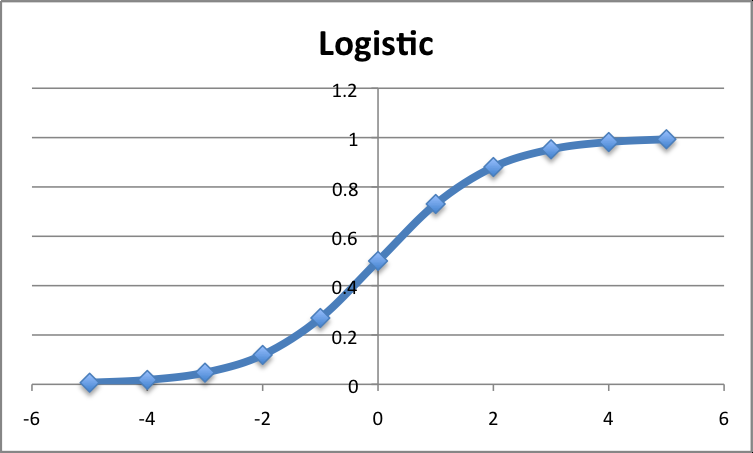

# Linear Discriminant Analysis: 

Logistic regression is a simple and powerful linear classification algorithm. It also has limitations
that suggest at the need for alternate linear classification algorithms.

<b>Two-Class Problems</b>

Logistic regression is intended for two-class or binary classification
problems. It can be extended for multiclass classification, but is rarely used for this purpose.


<b>Unstable With Well Separated Classes. </b>

Logistic regression can become unstable when the classes are well separated.
 

<b>Unstable With Few Examples</b>

Logistic regression can become unstable when there
are few examples from which to estimate the parameters.


Linear discriminant analysis does address each of these points and is the go-to linear method
for multiclass classification problems. Even with binary-classification problems, it is a good idea
to try both logistic regression and linear discriminant analysis.

LDA consists of statistical properties of your data, calculated for each class. For a single input variable (x) this is the mean and the variance of the variable for each class.

<b>Input for LDA: </b>


* Data is Gaussian, that each variable is is shaped like a bell curve when plotted.

* Each attribute has the same variance, that values of each variable vary around the
    mean by the same amount on average.
    
    
<b>Prepare the data for LDA: </b>


<b>Classification Problems. </b>

This might go without saying, but LDA is intended for classification problems where the output variable is categorical. LDA supports both binary and multiclass classification.


<b>Gaussian Distribution.</b>

The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root
for exponential distributions and Box-Cox for skewed distributions).


<b>Remove Outliers. </b>

Consider removing outliers from your data. These can skew the basic statistics used to separate classes in LDA such the mean and the standard deviation.


<b>Same Variance. </b>

LDA assumes that each input variable has the same variance. It almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

# Quadratic Discriminant Analysis:

Thumb rule: 

Same as LDA but Each class uses its own estimate of variance (or covariance when there are multiple input variables).

# Pocket Algorithm: 


The perceptron learning algorithm does not terminate if the learning set is not linearly separable.  In many real-world cases, however,  we want to find the "best" linear separation even when the learning sets are not ideal. The pocket algorithm is a modification of the perceptron rule proposed by S. I. Gallant (1990). It stores the best weight vector so far in a "pocket" while continuing to learn.  The weights are actually modified only if a better weight vector is found. 

# Pocket algorithm: 

In [23]:
from copy import deepcopy as copy 
class Pocket(Classifier):
    
    def __init__(self, N, alpha):
        Classifier.__init__(self)
        self.w=None
        self.alpha=alpha
        self.wp=None
        self.N=N
        self.binary=True
    
        
# return 1 if w is better -1 if wp is better        
    def compare(self, X, T, w, wp):
        y = X @ w
        yp = X @ wp
        return 1 if np.sum((y - T)**2) <= np.sum((yp - T)**2) else -1

#Training
    def train(self, X, T):
        Xt=self.normalize(X)
        X1=self.add_ones(Xt)
        N1=X1.shape[1]
        N0=X.shape[0]
        if np.any(self.wp) == None:
            self.w=np.zeros(N1)
            self.wp=copy(self.w)
        for i in range(self.N):
            converged = True
            for k in range(N1):
                self.w=self.wp+self.alpha*(T[k]-X1[k]@self.wp)*X1[k]/2
                ##### additional for pocket algorithm 
                if self.compare(X1,T,self.w,self.wp) == 1:
                    self.wp=copy(self.w)

# applying the model to data X
    
    def use(self, X, threshold=0.5):
        Xs=self.normalize(X)
        X1=self.add_ones(Xs)
        if self.binary:
            return np.array([1 if i > threshold else 0 for i in X1@self.wp])
        return(X1@self.wp)

# Experiment 1 : Pocket algorithm

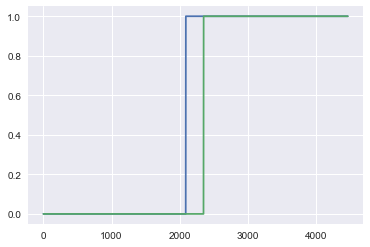

In [46]:
poc = Pocket (10, 0.1)
poc.train(X_train, y_train)
Xt = poc.use(X_test)
plt.plot(np.sort(Xt,0))
plt.plot(np.sort(y_test,0)) # target

# How it works? 

Lets understand the code with respect to the output: 

Here we have our dataset X_train which is a training data and y_train which is the training target class. 
The pocket(10,0.1) refers to the iterations and learning rate that is our alpha which we have passed in the class Pocket. 

In this class, we have defined a function train which will train to iterate better weights and moving on with the computation. Pocket algorith is superior to perceptron. By all means we are using the data from super class and we would use the normalized values for our training. 

<b> Output </b> 

The output shows that there are two plots which is training and testing line. The difference between the two shows the different outcome y for X_train and X_test in our code. 

The accuracy will be calculated below, seperately, for train and test dataset. 

In [47]:
rows = X.shape[0]
poc.train(X_train, y_train)
p1 =poc.use(X_train)
accuracy = (np.sum(p1==y_train)/X_train.shape[0])*100
error = 1/rows*np.sum(p1!=y_train)
print(accuracy)
print(error)


63.4612513066
0.219225945171


In [48]:
poc.train(X_test, y_test)
p1=poc.use(X_test)
accuracy = (np.sum(p1==y_test)/X_train.shape[0])*100
error = 1/rows*np.sum(p1!=y_test)
print(accuracy)
print(error)

42.1979991041
0.146837484322


<b> Accuracy </b>

The above code shows accuracies for training and testing seperately. 

Accuracy of train dataset: 63.46% and the error is 21%

Accuracy of test dataset: 42.19% and the error is 14%

# Observations: 

* Looking at the graph we can analyse that the training data has approximately 2400 sample which belong to class zero that is the customer did not deposit (subscribed) in bank. 

* The rest of the customers did deposit in bank and they have been classified as class 1 sample data. 

* Test data shows that 2100 customers did not deposit in bank and the rest of them did so. 

# Quadratic Discriminant Analysis: 

In [27]:
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.cov={}
        self.mu={}
        self.prior={}
        
    def QDA(self, X, mu, sigma, prior):
        D = X.shape[1]
        detSigma = sigma if D == 1 else np.linalg.det(sigma)
        if detSigma == 0:
            raise np.linalg.LinAlgError('normald(): Singular covariance matrix')
        return -1/2*np.log(detSigma)-1/2*np.sum(np.dot((X-mu),np.linalg.inv(sigma))*(X-mu), axis=1)[:np.newaxis]+np.log(prior)
      
    def train(self, X, T):
        self.targetType=list(set(T.flatten()))
        N=X.shape[0]
        for t in self.targetType:
            Xsub=X[np.where(T == t)[0],:]
            self.cov[t]=np.cov(Xsub.T)
            self.mu[t]=np.mean(Xsub, 0)
            self.prior[t]=Xsub.shape[0]/N
            
    def use(self, X):
        probs={}
        for t in self.targetType:
            probs[t]=self.QDA(X, self.mu[t], self.cov[t], self.prior[t])
        target=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            target[i]=self.targetType[np.argmax([probs[t][i] for t in self.targetType])]
        return target
        

# Experiment 2: QDA

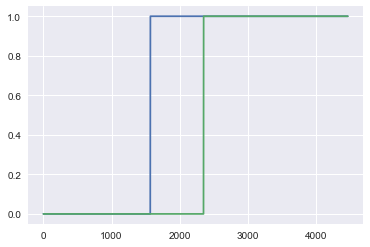

In [28]:
qda = QDA ()
qda.train(X_train, y_train)
Xt = qda.use(X_test)
plt.plot(np.sort(Xt,0))
plt.plot(np.sort(y_test,0)) # target

# How it works?


Lets understand the code with respect to the output: 

Here we have our dataset X_train which is a training data and y_train which is the training target class. The QDA algorithm takes X, mu, sigma, prior as arguments and these are nothing but our dataset, mean, standard deviation of the data. 
 
Output 

The output shows that there are two plots which is training and testing line. The difference between the two shows the different outcome y for X_train and X_test in our code. 

The accuracy will be calculated below, seperately, for train and test dataset.

In [32]:
rows = X.shape[0]
qda.train(X_train, y_train)
q=qda.use(X_train)
accuracy = (np.sum(q==y_train)/X_train.shape[0])*100
error = 1/rows*np.sum(q!=y_train)
print(accuracy)
print(error)

63.6553680753
0.218061279341


In [33]:
qda.train(X_test, y_test)
q=qda.use(X_test)
accuracy = (np.sum(q==y_test)/X_train.shape[0])*100
error = 1/rows*np.sum(q!=y_test)
print(accuracy)
print(error)

41.7500373301
0.1495251747


 <b> Accuracy </b>

The above code shows accuracies for training and testing seperately. 

Accuracy of train dataset: 63.65% and the error is 21%
    
   Here we see an interesting trend that the accuracy of pocket and QDA is not too different. Of course on other experiments I have observd that it does differ however on the dataset that we have chosen in this problem shows this interesting behavior. 

Accuracy of test dataset: 41.75% and the error is 14%

# Observations: 


* Looking at the graph we can analyse that the training data has approximately 2300 sample which belong to class zero that is the customer did not deposit (subscribed) in bank. 

* The rest of the customers did deposit in bank and they have been classified as class 1 sample data. 

* Test data shows that approximately only 1800 customers did not deposit in bank and the rest of them did so.

# Linear Discriminant Analysis: 

In [35]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.cov=None
        self.mu={}
        self.prior={}
        
    def LDA(self, X, mu, sigma, prior):
        return np.sum(np.dot(X,np.linalg.inv(sigma))*mu, axis=1)-1/2*np.dot(mu,np.linalg.inv(sigma))@mu+np.log(prior)

    def train(self, X, T):
        self.targetType=list(set(T.flatten()))
        N=X.shape[0]
        self.cov=np.cov(X.T)
        for t in self.targetType:
            Xsub=X[np.where(T == t)[0],:]
            self.mu[t]=np.mean(Xsub, 0)
            self.prior[t]=Xsub.shape[0]/N
            
    def use(self, X):
        probs={}
        for t in self.targetType:
            probs[t]=self.LDA(X, self.mu[t], self.cov, self.prior[t])
        target=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            target[i]=self.targetType[np.argmax([probs[t][i] for t in self.targetType])]
        return target

# Experiment 3: LDA

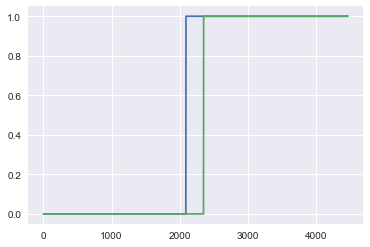

In [36]:
lda = LDA ()
lda.train(X_train, y_train)
Xt = lda.use(X_test)
plt.plot(np.sort(Xt,0))
plt.plot(np.sort(y_test,0)) # target

# How it works?

As we have mentioned in description, our data has two class classification. In the LDA we have calculated mean and variance of each class. 





In [37]:
rows = X.shape[0]
lda.train(X_train, y_train)
l=lda.use(X_train)
accuracy = (np.sum(l==y_train)/X_train.shape[0])*100
error = 1/rows*np.sum(l!=y_train)
print(accuracy)
print(error)

63.4911154248
0.219046765813


In [38]:
lda.train(X_test, y_test)
l=lda.use(X_test)
accuracy = (np.sum(l==y_test)/X_train.shape[0])*100
error = 1/rows*np.sum(l!=y_test)
print(accuracy)
print(error)

42.9446020606
0.142358000358


 <b> Accuracy </b>

The above code shows accuracies for training and testing seperately. 

Accuracy of train dataset: 63.49% and the error is 21%
    
Here we see an interesting trend that the accuracy of pocket and QDA is not too different. Of course on other experiments I have observd that it does differ however on the dataset that we have chosen in this problem shows this interesting behavior. 

Accuracy of test dataset: 42.94% ~ 43% and the error is 14%

# Observations: 

As compared to QDA, our LDA algorithm does show some better classification visually. 
According to the graph, out of approximately 4800 customers, 2200 customers did not deposit and the rest show success rate. In the train dataset also, 2100 customer has no deposit and the rest went ahead with the same. 

# Logistic Regression:

* In the Logistic Regression which is a Classification machine learning algorith, we have studied that the output of the          Logistic Regression will be a probability. The dependent variable here is a binary variable that contains data coded as 1 for "yes" or "success" or 0 for "No" or "failure".

In [39]:
def OneHot(T):
    targetType=list(set(T.flatten()))
    oneHotT=np.zeros((T.shape[0], len(targetType)))
    for i in range(T.shape[0]):
        oneHotT[i,int(T[i])]=1
    return oneHotT

class LogisticRegression(Classifier):
    
    def __init__(self, alpha, niter, binary=True):
        Classifier.__init__(self)
        self.alpha=alpha
        self.niter=niter
        self.binary=True
 
    def softmax(self, X, w):
        return np.exp(X@w-np.max(X@w, axis=1).reshape((-1,1)))/np.sum(np.exp(X@w-np.max(X@w, axis=1).reshape((-1,1))),axis=1)[:,np.newaxis]
    
    def train(self, X, T, pocket=False):
        oneHotT=OneHot(T)
        X=self.normalize(X)
        X1=self.add_ones(X)
        self.w=np.zeros((X1.shape[1], oneHotT.shape[1]))
        for step in range(self.niter):           
            self.w=self.w+self.alpha*X1.T@(oneHotT-self.softmax(X1,self.w))

            
    def use(self, X, threshold=0.5):
        assert np.any(self.w) != None, "Weights not learned yet"
        X = (X - self.meanX) / self.stdX
        X1=self.add_ones(X)
        Y=self.softmax(X1, self.w)
        if self.binary:
            return np.array([1 if y[1] >= threshold else 0 for y in Y])
        return np.argmax(Y, axis=1)
    

# Experiment 4: Logistic Regression

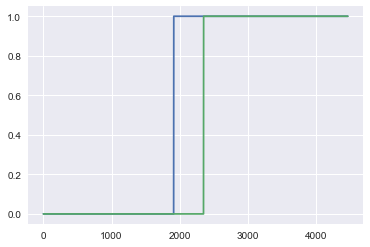

In [40]:
%matplotlib inline
lr = LogisticRegression (0.1, 10)
lr.train(X_train, y_train)
Xt = lr.use(X_test)
plt.plot(np.sort(Xt,0))
plt.plot(np.sort(y_test,0)) # target

# How it works? 

In the Logistic Regression class, we have used softmax function. Though the softmax function is well known for multi-class, classification, since it handles the outliers well, we shall use this method in our data. 

We will pass the arguments of iterations and learning rate in logistic regresion while calling it to run on test and train. After the features that is our X_train is passed through the logistic regression model, the probabilities are calculated for it to belong to either class zero or class one. 

We have understood the input and output mechanism in the theory explained above. The graph of logstic regression could be plotted in many ways as we have learned in class however, for simple comparison of outputs we will stick to the same style. 

In [41]:
rows = X.shape[0]
lr.train(X_train, y_train)
r=lr.use(X_train)
accuracy = (np.sum(r==y_train)/X_train.shape[0])*100
error = 1/rows*np.sum(r!=y_train)
print(accuracy)
print(error)

64.4467672092
0.213313026339


In [42]:
lr.train(X_test, y_test)
r=lr.use(X_test)
accuracy = (np.sum(r==y_test)/X_train.shape[0])*100
error = 1/rows*np.sum(r!=y_test)
print(accuracy)
print(error)

43.0939226519
0.141462103566


 <b> Accuracy </b>

The above code shows accuracies for training and testing seperately. 

Accuracy of train dataset: 64.44% and the error is 21%
    
Here we see an interesting trend that the accuracy of pocket and QDA is not too different. Of course on other experiments I have observd that it does differ however on the dataset that we have chosen in this problem shows this interesting behavior. 

Accuracy of test dataset: 43.09% and the error is 14%

# Observations: 

As similar to above plots in the logistic regression plot also we can see that from train data 2400 samples say no deposit and from test data 1900 samples (approx) say no deposit. Rest of the sample have deposited in bank. 

# Calculating the precision recall and f1 score for given data: 




In [78]:
y_pred = lr.use(X_test)


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1509  840]
 [ 739 1377]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.64      0.66      2349
          1       0.62      0.65      0.64      2116

avg / total       0.65      0.65      0.65      4465



# Evaluation Metrics: 

Here we have simple calculated the accuracy of training and testing data for each algorithm namely Pocket, QDA, LDA and Logistic Regression. Comapring all the accuracies of train datasets, the Logistic regression is a clear winner. Though mathematically 64% for train data and 43% for test data is not a big number, as compared to other three algorithm, LR handles this classification the best.  

We know that precision is TP / TP+FP where TP is true positive and FP is false positive. 

The code below shows that precision for our data for class 0 is 67% and for class 1 is 62%
Recall is TP/TP+FN which is 64% for class 0 and 65% for class 1. 

The f1 score is an average of precision and recall. 

# Classification Model Comparison: 


* Two of the most widely used statistical methods for analyzing
    categorical outcome variables are linear discriminant analysis and logistic
    regression. While both are appropriate for the development of linear
    classification models, linear discriminant analysis makes more assumptions
    about the underlying data. Hence, it is assumed that logistic regression is
    the more flexible and more robust method in case of violations of these assumptions

* Comparing the algorithms: 

1. Error: This is one of the strongest point to discriminate between classifiers. In our dataset, Logistic regression has the lowest 

2. Graphical representation:All the graphs succeed in classifying the data correctly. 

3. Sample size: As the sample size increases, the LDA coefficient estimations become more accurate. 

# Conclusion:

In this assignment we have learnt how to use Python class to use classification. We have implemented four algorithms. 

1. Pocket
2. QDA 
3. LDA 
4. Logistic regression. 

The simplicity of LDA and Logistic regression is one of the favorite techniques used in business world. We have also learned how using the python class can make further computation simpler. 

Challenges: 

Many a times it is best to keep preprocessing simple yet concise to get to the point results. 

# Reference

* <i>https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

* <i>http://www.scipy-lectures.org/advanced/scikit-learn/

* <i>https://www.kaggle.com/mayurjain/ml-bank-marketing-solution/notebook

* <i>https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb

* <i>https://github.com/rasbt/python-machine-learning-book

* <i>Class notes from Classification topic.

* <i>Machine Learning Algorith from Scratch by Jason Brownlee

* Worked with classmates Youngi Su and Rakesh Harish. 




